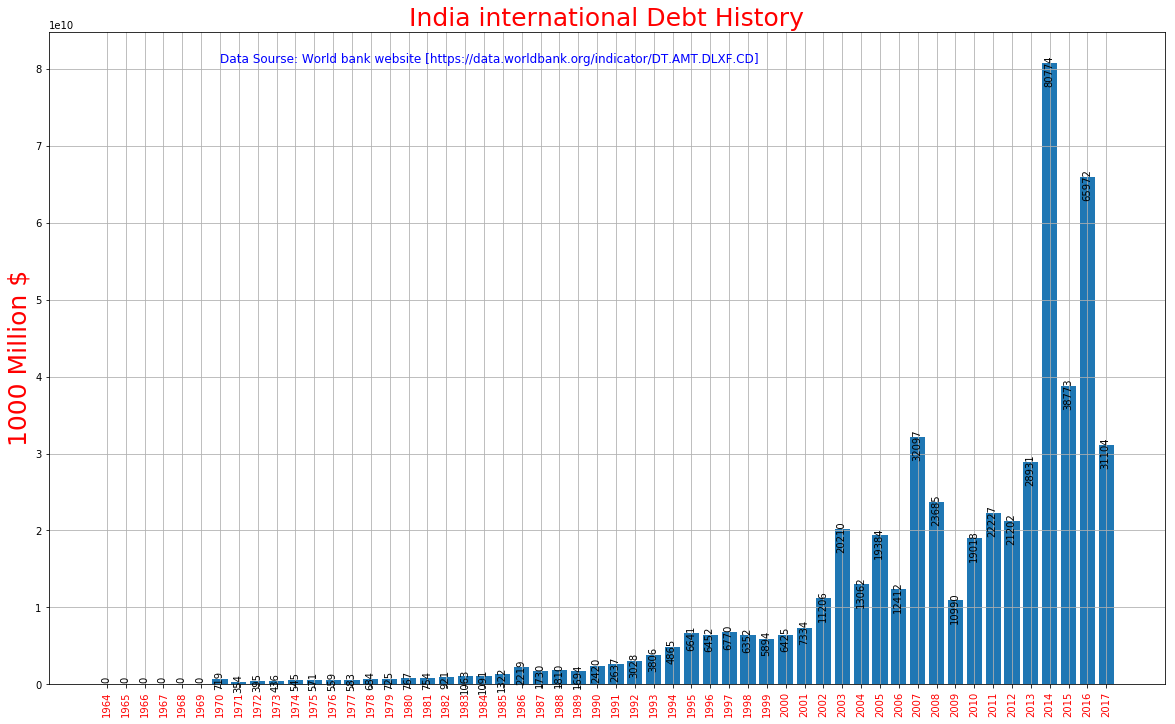

None


In [2]:
import pandas as pd
df = pd.read_csv('/home/hp/Downloads/data_sets/countries_debt/API_DT.AMT.DLXF.CD_DS2_en_csv_v2.csv').drop([0]).set_index('Data Source')
new_columns_names = list(df.iloc[0].values)
df.set_axis(new_columns_names, axis = 'columns', inplace=True)
df.drop(['Country Name'], inplace = True)
from matplotlib import pyplot as plt
#for i in df.index: print(i, end=',')
def international_Debt_History(country_name, x_size, y_size):
    country = df.loc[country_name]
    debt = list(country.values)[7:]
    years = list(country.keys()[7:])
    min_debt = min([i for i in debt if i != 0])
    max_debt = max(debt)
    for i in debt:
        if str(i) == 'nan':
            debt[debt.index(i)] = 0
    plt.figure(figsize=(x_size,y_size))
    bar = plt.bar(years, debt)
    plt.title('{} international Debt History'.format(country_name), size = 25, color= 'r')
    plt.ylabel('1000 Million $', size = 25, color='r')
    plt.xticks(years, rotation=90, color='r')
    for i in bar: 
        plt.text(i.get_x()+0.1,i.get_height(),\
                 str(int(round(debt[bar.index(i)]/1000000))), rotation = 90)
    #plt.tick_params(direction='out', length=6, width=2, colors='r')
    plt.grid(True)
    plt.text(1970, max(debt), 'Data Sourse: World bank website [https://data.worldbank.org/indicator/DT.AMT.DLXF.CD]', color='b', size = 12)
    plt.savefig('{}.svg'.format(country_name))
    plt.show()
#print(international_Debt_History('Pakistan', 12, 6))
print(international_Debt_History('India', 20, 12))
